In [ ]:
# --------------------------------------------------------------
# Trabalho Final - Aprendizado Supervisionado
# Grupo 1: Gabriella Pinheiro
# Regressão Linear: Aprimoramento de Modelo de Previsão de Preços de Imóveis na Califórnia
# --------------------------------------------------------------

In [ ]:
# Importação das bibliotecas necessárias para o projeto

# Bibliotecas de manipulação e análise de dados
import numpy as np  # Biblioteca para operações matemáticas e com arrays
import pandas as pd  # Biblioteca para manipulação de dados em formato tabular (DataFrames)

# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca baseada no matplotlib com visualizações estatísticas mais avançadas

# Conjunto de dados da Califórnia (utilizado como base para o projeto)
from sklearn.datasets import fetch_california_housing  # Função para carregar o dataset de preços de imóveis na Califórnia

# Ferramentas para separar os dados em treino e teste
from sklearn.model_selection import train_test_split  # Função para dividir os dados entre treino e teste

# Modelo de regressão linear simples
from sklearn.linear_model import LinearRegression  # Classe que implementa o modelo de Regressão Linear

# Métricas de avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Métricas para avaliar o desempenho do modelo

# Configuração para ignorar avisos durante a execução
import warnings
warnings.filterwarnings('ignore')  # Ignora avisos que não afetam a execução do projeto

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')  # Define o estilo de fundo dos gráficos com grade branca (visual limpo e moderno)
sns.set_palette("deep")  # Define a paleta de cores padrão para os gráficos do seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Define o tamanho padrão das figuras (largura = 10, altura = 6)


In [ ]:
# Carrega o conjunto de dados de preços de imóveis na Califórnia disponível no scikit-learn
california = fetch_california_housing()

# Cria um DataFrame pandas com as variáveis explicativas (features), nomeando as colunas conforme os nomes originais
X = pd.DataFrame(california.data, columns=california.feature_names)

# Cria uma Series pandas com a variável alvo (preço médio das casas), nomeando-a como 'MedHouseValue'
y = pd.Series(california.target, name='MedHouseValue')

# Concatena os dados de entrada (X) e a variável alvo (y) em um único DataFrame para facilitar a visualização e análise
df = pd.concat([X, y], axis=1)

# Exibe as primeiras linhas do DataFrame resultante
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [12]:
# =========================
# Exploração e Análise de Dados
# =========================

# Verifica o tamanho do dataset
print("Formato do DataFrame:", df.shape)

# Exibe informações gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
print("\nInformações do DataFrame:")
print(df.info())

# Estatísticas descritivas para todas as variáveis
print("\nEstatísticas descritivas:")
print(df.describe())

# Verifica valores ausentes em cada coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Formato do DataFrame: (20640, 9)

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      


Tipo de dado: float64
Valores ausentes: 0

Estatísticas descritivas da variável alvo:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseValue, dtype: float64


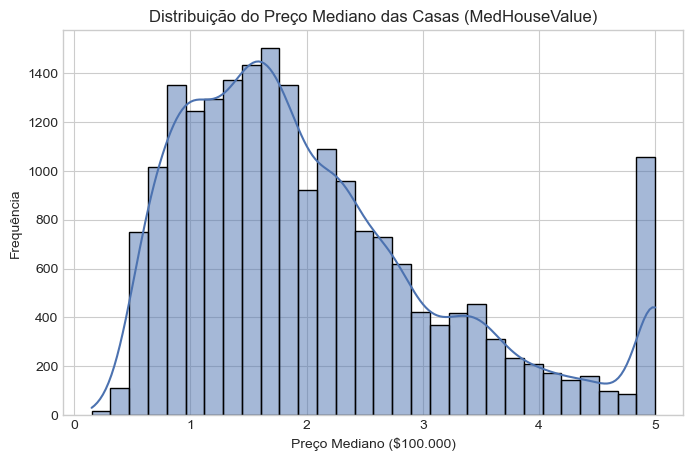

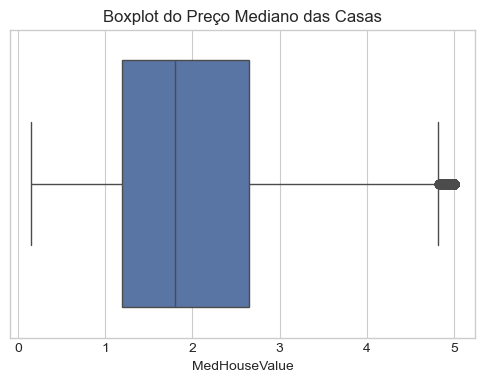

In [13]:
# =========================
# Etapa: Exploração da Variável Alvo (y - MedHouseValue)
# =========================

# Verifica o tipo de dado e se há valores ausentes
print("\nTipo de dado:", y.dtype)
print("Valores ausentes:", y.isnull().sum())

# Estatísticas descritivas da variável alvo
print("\nEstatísticas descritivas da variável alvo:")
print(y.describe())

# Histograma para visualizar a distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.title('Distribuição do Preço Mediano das Casas (MedHouseValue)')
plt.xlabel('Preço Mediano ($100.000)')
plt.ylabel('Frequência')
plt.show()

# Boxplot para identificar presença de outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=y)
plt.title('Boxplot do Preço Mediano das Casas')
plt.xlabel('MedHouseValue')
plt.show()


Limite inferior: -0.98
Limite superior: 4.82

Número de outliers detectados: 1071
Proporção de outliers no total: 5.19%


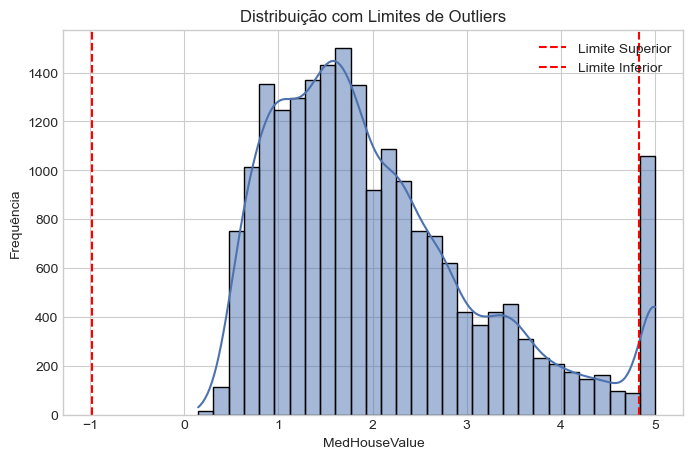

In [ ]:
# =========================
# Análise de Outliers na Variável Alvo (MedHouseValue)
# =========================

# Calcula os quartis
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil

# Define os limites inferior e superior para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identifica valores que estão fora desses limites
outliers = y[(y < limite_inferior) | (y > limite_superior)]
print(f"\nNúmero de outliers detectados: {outliers.shape[0]}")
print(f"Proporção de outliers no total: {100 * outliers.shape[0] / y.shape[0]:.2f}%")

# Visualização com histograma para ver a cauda da distribuição
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.axvline(limite_superior, color='red', linestyle='--', label='Limite Superior')
plt.axvline(limite_inferior, color='red', linestyle='--', label='Limite Inferior')
plt.title('Distribuição com Limites de Outliers')
plt.xlabel('MedHouseValue')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [ ]:
# Remove outliers if necessary
# Uncomment the line below to remove outliers
# df = df[(df['MedHouseValue'] >= lower_bound) & (df['MedHouseValue'] <= upper_bound)]
# print(f"Shape after removing outliers: {df.shape}")


Informações gerais das variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Valores ausentes por variável:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429

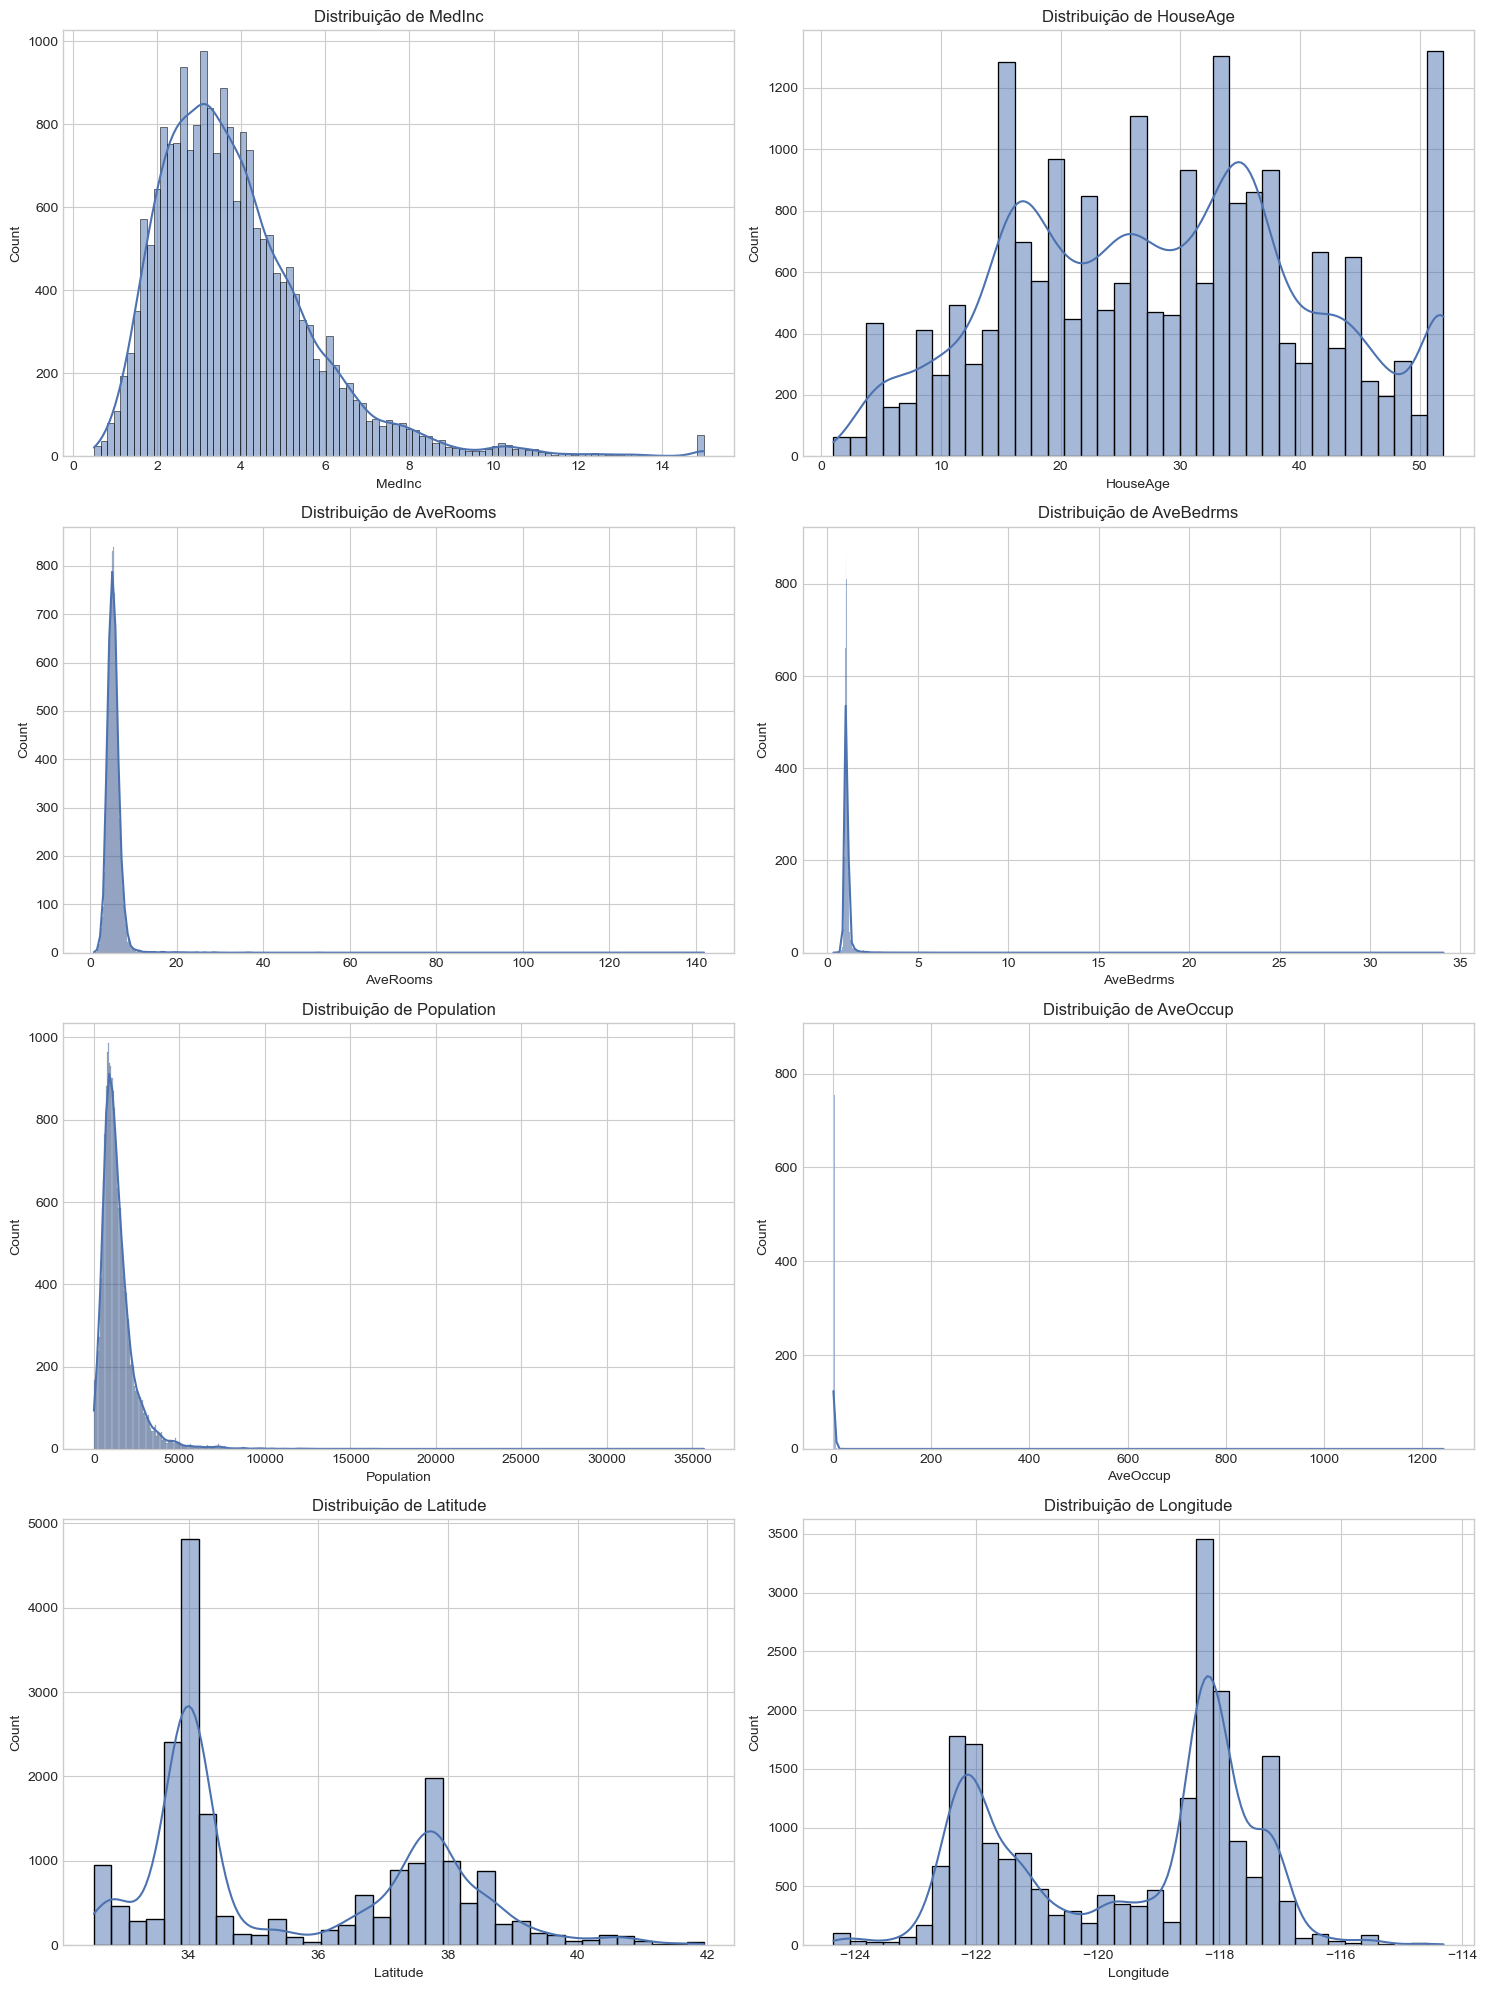

In [23]:
# =========================
# Exploração e Análise das Variáveis Explicativas (X)
# =========================

# Exibe informações sobre os tipos de dados e a presença de valores ausentes nas variáveis explicativas
print("\nInformações gerais das variáveis:")
print(X.info())

# Verifica a quantidade de valores ausentes em cada coluna
print("\nValores ausentes por variável:")
print(X.isnull().sum())

# Exibe estatísticas descritivas (média, desvio padrão, quartis, etc.) para cada variável explicativa
print("\nEstatísticas descritivas:")
print(X.describe())

# Visualização das distribuições de cada variável explicativa
# Cria uma grade de subplots com 4 linhas e 2 colunas (8 gráficos ao todo)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Transforma a grade 2D de eixos em um array 1D para facilitar a iteração
axes = axes.flatten()

# Para cada variável explicativa, plota um histograma com curva de densidade (KDE)
for i, feature in enumerate(X.columns):
    sns.histplot(df[feature], kde=True, ax=axes[i])  # Histograma + KDE
    axes[i].set_title(f'Distribuição de {feature}')
    axes[i].set_xlabel(feature)

# Ajusta automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


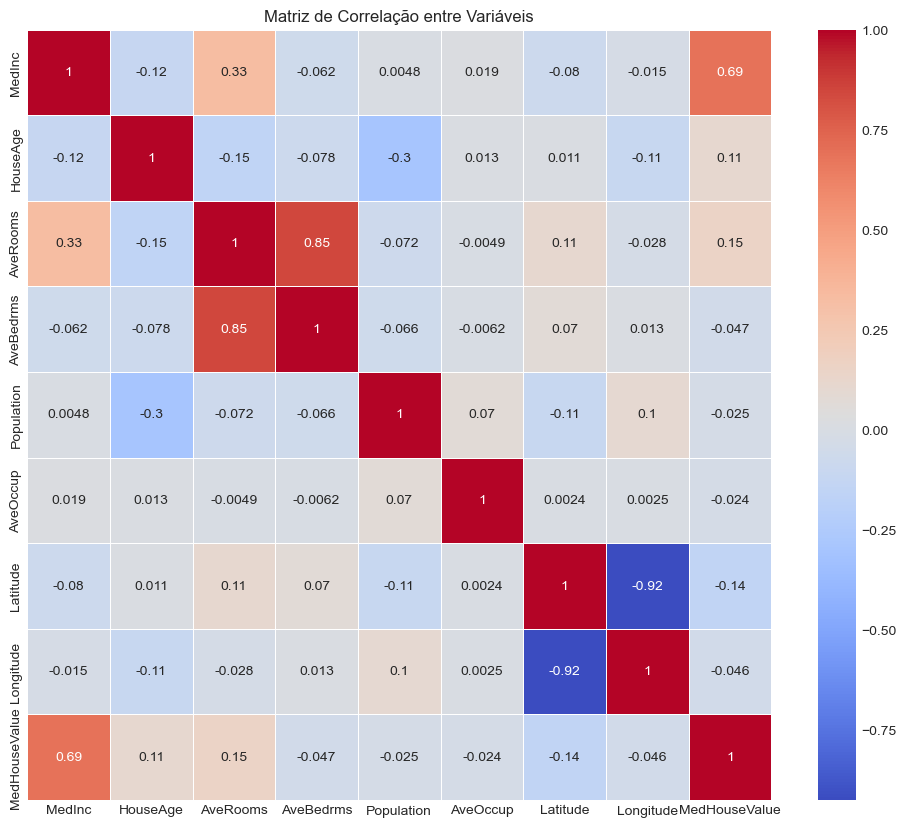


Correlação das variáveis com MedHouseValue:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseValue, dtype: float64


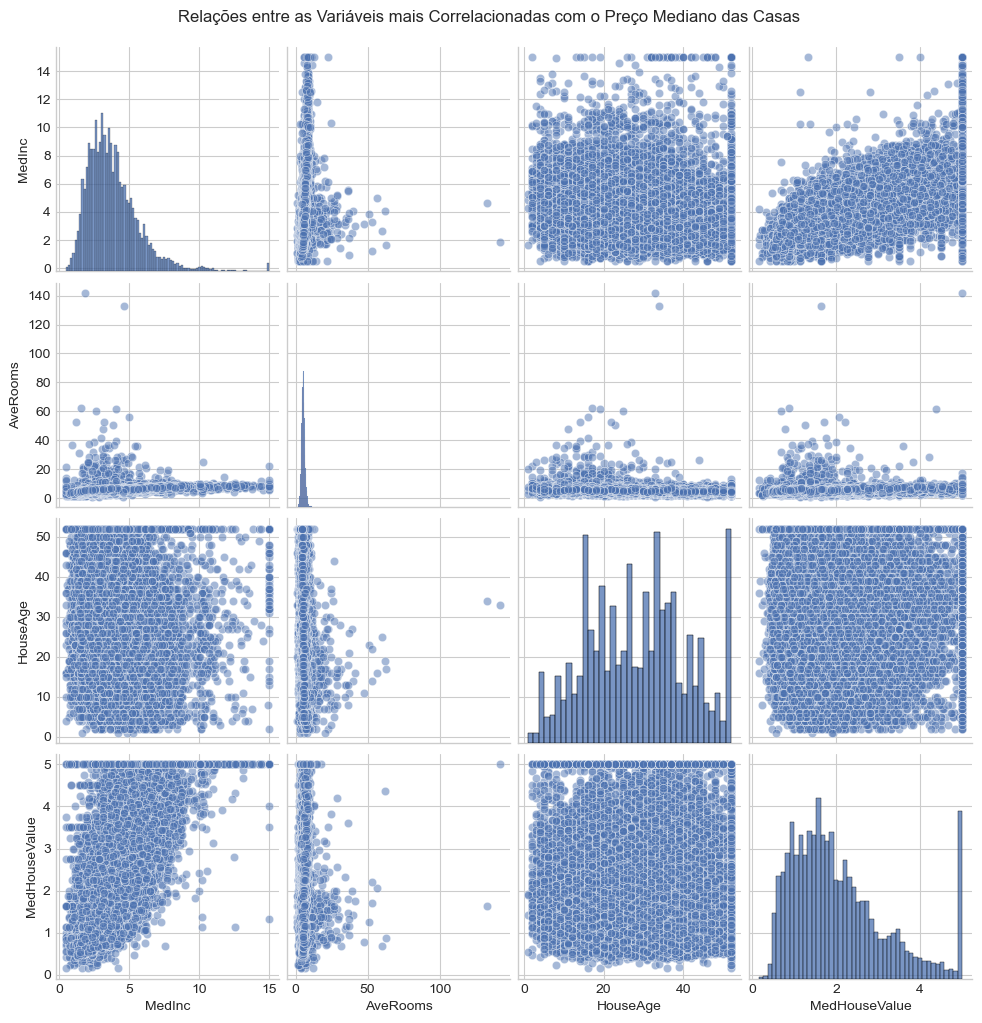

In [22]:
# =========================
# Análise de Correlação entre Variáveis
# =========================

# Cria uma figura para o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))

# Calcula a matriz de correlação entre todas as variáveis do DataFrame (incluindo a variável alvo)
correlation_matrix = df.corr()

# Gera o mapa de calor (heatmap) para visualizar as correlações entre variáveis
# - annot=True: exibe os valores numéricos de correlação dentro de cada célula
# - cmap='coolwarm': usa uma paleta de cores do azul (negativo) ao vermelho (positivo)
# - linewidths=0.5: adiciona linhas entre as células para melhor visualização
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

# Isola a correlação das variáveis explicativas com a variável alvo (MedHouseValue), excluindo ela mesma
target_corr = correlation_matrix['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)

# Exibe as variáveis mais correlacionadas com o preço mediano das casas
print("\nCorrelação das variáveis com MedHouseValue:")
print(target_corr)

# Seleciona as 3 variáveis com maior correlação com o alvo
top_features = target_corr.head(3).index.tolist()
top_features.append('MedHouseValue')  # Inclui o alvo para gerar o pairplot

# Gera um pairplot para visualizar a relação entre as variáveis mais relevantes e o preço das casas
# - plot_kws={'alpha': 0.5}: torna os pontos mais transparentes para facilitar a visualização de sobreposições
sns.pairplot(df[top_features], plot_kws={'alpha': 0.5})
plt.suptitle('Relações entre as Variáveis mais Correlacionadas com o Preço Mediano das Casas', y=1.02)
plt.show()


In [36]:
# =========================
# Preparação dos Dados para Modelagem
# =========================

# Separa as variáveis explicativas (X) da variável alvo (y)
X = df.drop('MedHouseValue', axis=1)  # Remove a variável alvo do DataFrame para obter apenas as features
y = df['MedHouseValue']               # Define a variável alvo

# Divide os dados em conjunto de treino (80%) e teste (20%)
# - random_state=42 garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")


# Based on the correlation matrix, select the feature with the strongest correlation to the target
# for our first simple linear regression model
# Let's assume 'MedInc' (median income) has the highest correlation
# You should replace 'MedInc' with the actual feature that shows the strongest correlation from your analysis

# Get the feature with the highest correlation with MedHouseValue
correlations_with_target = correlation_matrix['MedHouseValue'].drop('MedHouseValue')
strongest_feature = correlations_with_target.abs().idxmax()

print(f"The feature with the strongest correlation to the target is: {strongest_feature}")
print(f"Correlation value: {correlations_with_target[strongest_feature]:.4f}")


Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras
The feature with the strongest correlation to the target is: MedInc
Correlation value: 0.6881


In [38]:
# Simple Linear Regression with the strongest feature
# Create a DataFrame with just the strongest feature
X_train_simple = X_train[[strongest_feature]]
X_test_simple = X_test[[strongest_feature]]

# Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# Get predictions
y_train_pred_simple = simple_model.predict(X_train_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)


# Evaluate the simple model
# Calculate metrics
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_mape_simple = np.mean(np.abs((y_train - y_train_pred_simple) / y_train)) * 100
train_r2_simple = r2_score(y_train, y_train_pred_simple)

test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_mape_simple = np.mean(np.abs((y_test - y_test_pred_simple) / y_test)) * 100
test_r2_simple = r2_score(y_test, y_test_pred_simple)

# Print metrics
print(f"Simple Linear Regression with {strongest_feature}:")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_simple:.4f}")
print(f"RMSE: {train_rmse_simple:.4f}")
print(f"MAE: {train_mae_simple:.4f}")
print(f"MAPE: {train_mape_simple:.2f}%")
print(f"R²: {train_r2_simple:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_simple:.4f}")
print(f"RMSE: {test_rmse_simple:.4f}")
print(f"MAE: {test_mae_simple:.4f}")
print(f"MAPE: {test_mape_simple:.2f}%")
print(f"R²: {test_r2_simple:.4f}")

Simple Linear Regression with MedInc:

Training Metrics:
MSE: 0.6991
RMSE: 0.8361
MAE: 0.6250
MAPE: 38.47%
R²: 0.4770

Testing Metrics:
MSE: 0.7091
RMSE: 0.8421
MAE: 0.6299
MAPE: 39.06%
R²: 0.4589


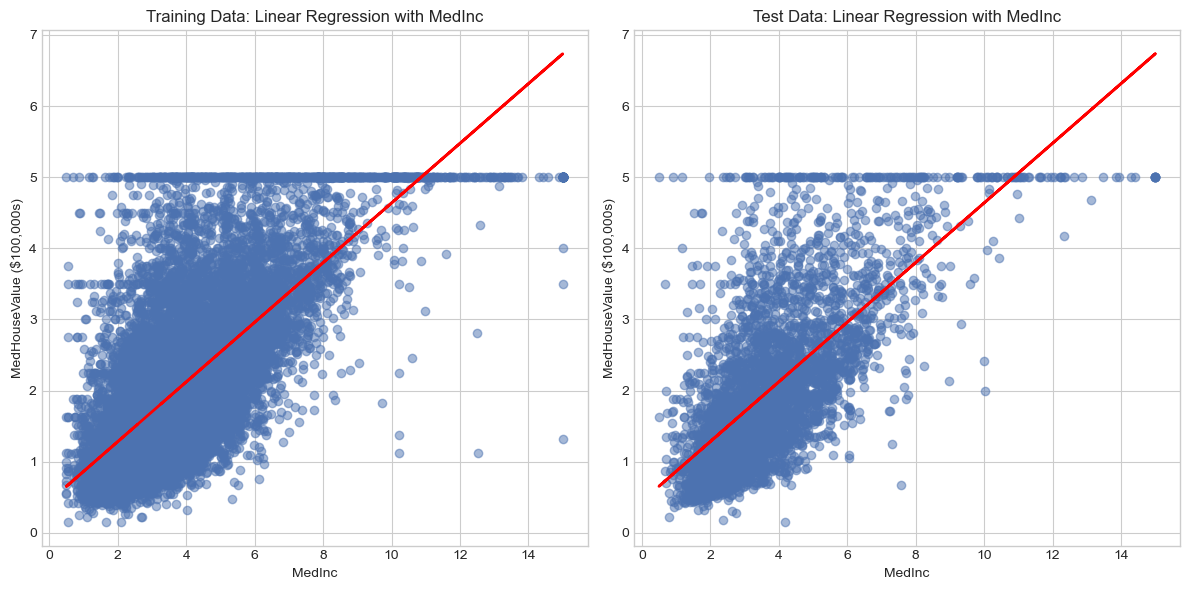

Simple Linear Regression Model:
Coefficient for MedInc: 0.4193
Intercept: 0.4446
Equation: MedHouseValue = 0.4446 + 0.4193 * MedInc


In [43]:
# Visualize the simple linear regression results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_simple, y_train, alpha=0.5)
plt.plot(X_train_simple, y_train_pred_simple, color='red', linewidth=2)
plt.title(f'Training Data: Linear Regression with {strongest_feature}')
plt.xlabel(strongest_feature)
plt.ylabel('MedHouseValue ($100,000s)')

plt.subplot(1, 2, 2)
plt.scatter(X_test_simple, y_test, alpha=0.5)
plt.plot(X_test_simple, y_test_pred_simple, color='red', linewidth=2)
plt.title(f'Test Data: Linear Regression with {strongest_feature}')
plt.xlabel(strongest_feature)
plt.ylabel('MedHouseValue ($100,000s)')

plt.tight_layout()
plt.show()


# NEW CELL ————
# Print model coefficients
print(f"Simple Linear Regression Model:")
print(f"Coefficient for {strongest_feature}: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Equation: MedHouseValue = {simple_model.intercept_:.4f} + {simple_model.coef_[0]:.4f} * {strongest_feature}")



In [44]:
# Now, let's select multiple features for a more complex model

# Option 1: Select features with correlation above a threshold
correlation_threshold = 0.4  # Adjust based on your correlation matrix
selected_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Option 2: Select top N features with highest correlation
n_top_features = 3  # Change as needed
top_features = correlations_with_target.abs().sort_values(ascending=False).index[:n_top_features].tolist()

# Choose which selection method to use
features_to_use = top_features  # Change to selected_features if you prefer that method
print(f"Selected features for multiple regression: {features_to_use}")

Selected features for multiple regression: ['MedInc', 'AveRooms', 'Latitude']


In [ ]:
# Now, let's select multiple features for a more complex model

# Option 1: Select features with correlation above a threshold
correlation_threshold = 0.4  # Adjust based on your correlation matrix
selected_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Option 2: Select top N features with highest correlation
n_top_features = 3  # Change as needed
top_features = correlations_with_target.abs().sort_values(ascending=False).index[:n_top_features].tolist()

# Choose which selection method to use
features_to_use = top_features  # Change to selected_features if you prefer that method
print(f"Selected features for multiple regression: {features_to_use}")

# Multiple Linear Regression with selected features
X_train_multi = X_train[features_to_use]
X_test_multi = X_test[features_to_use]

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

# Get predictions
y_train_pred_multi = multi_model.predict(X_train_multi)
y_test_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the multiple regression model
# Calculate metrics
train_mse_multi = mean_squared_error(y_train, y_train_pred_multi)
train_rmse_multi = np.sqrt(train_mse_multi)
train_mae_multi = mean_absolute_error(y_train, y_train_pred_multi)
train_mape_multi = np.mean(np.abs((y_train - y_train_pred_multi) / y_train)) * 100
train_r2_multi = r2_score(y_train, y_train_pred_multi)

test_mse_multi = mean_squared_error(y_test, y_test_pred_multi)
test_rmse_multi = np.sqrt(test_mse_multi)
test_mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
test_mape_multi = np.mean(np.abs((y_test - y_test_pred_multi) / y_test)) * 100
test_r2_multi = r2_score(y_test, y_test_pred_multi)

# Print metrics
print(f"Multiple Linear Regression with {len(features_to_use)} features:")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_multi:.4f}")
print(f"RMSE: {train_rmse_multi:.4f}")
print(f"MAE: {train_mae_multi:.4f}")
print(f"MAPE: {train_mape_multi:.2f}%")
print(f"R²: {train_r2_multi:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_multi:.4f}")
print(f"RMSE: {test_rmse_multi:.4f}")
print(f"MAE: {test_mae_multi:.4f}")
print(f"MAPE: {test_mape_multi:.2f}%")
print(f"R²: {test_r2_multi:.4f}")

Multiple Linear Regression with 3 features:

Training Metrics:
MSE: 0.6825
RMSE: 0.8261
MAE: 0.6134
MAPE: 37.08%
R²: 0.4895

Testing Metrics:
MSE: 0.6942
RMSE: 0.8332
MAE: 0.6215
MAPE: 37.90%
R²: 0.4703


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Encontra a variável mais correlacionada com MedHouseValue
correlacoes = df.corr()['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)
variavel_base = correlacoes.index[0]
print(f"Variável mais correlacionada: {variavel_base}")

# Cria X e y para o modelo base
X_base = df[[variavel_base]]
y = df['MedHouseValue']

# Divide treino/teste
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

# Treina modelo base
modelo_base = LinearRegression()
modelo_base.fit(Xb_train, yb_train)

# Faz predições
y_pred_base = modelo_base.predict(Xb_test)

# Calcula métricas
rmse_base = np.sqrt(mean_squared_error(yb_test, y_pred_base))
mape_base = np.mean(np.abs((yb_test - y_pred_base) / yb_test)) * 100

print("\nModelo Base (Regressão Simples):")
print(f"RMSE: {rmse_base:.4f}")
print(f"MAPE: {mape_base:.2f}%")


Variável mais correlacionada: MedInc

Modelo Base (Regressão Simples):
RMSE: 0.8421
MAPE: 39.06%


In [34]:
# =========================
# Seleção de Variáveis com SelectKBest (Regressão Múltipla Otimizada)
# =========================

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define X (todas as variáveis preditoras) e y (alvo)
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# Aplica SelectKBest com o teste f_regression para escolher as 5 melhores variáveis
selector = SelectKBest(score_func=f_regression, k=5)
X_selected_array = selector.fit_transform(X, y)

# Descobre os nomes das variáveis selecionadas
selected_columns = X.columns[selector.get_support()]
print("Variáveis selecionadas automaticamente:", list(selected_columns))

# Cria novo DataFrame só com as selecionadas
X_selected = X[selected_columns]

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Treina modelo de regressão múltipla com as variáveis selecionadas
modelo_otimizado = LinearRegression()
modelo_otimizado.fit(X_train, y_train)

# Faz predições
y_pred = modelo_otimizado.predict(X_test)

# Calcula métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Mostra os resultados
print("\nModelo de Regressão Múltipla com Variáveis Selecionadas:")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")


Variáveis selecionadas automaticamente: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']

Modelo de Regressão Múltipla com Variáveis Selecionadas:
RMSE: 0.7989
MAPE: 35.49%
R²: 0.5129
